Martha Lizeth Pastrana Basilio

Leonardo Daniel Rosas Rios

Matricula : 202050617

Matricula: 202055778

#   1.Descripción de la base de datos

En México la capacidad de leer y escribir es fundamental para el desarrollo individual y colectivo, tanto asi que es considerado dentro de los pricipales indices de desarrollo en los paises.

 En este ejercicio, exploramos la relación entre el número de nacimientos registrados y el nivel de alfabetización en los estados de la República Mexicana. Utilizaremos datos del Instituto Nacional de Estadística y Geografía (INEGI) correspondientes al año 2020, que proporcionan información detallada sobre ambos indicadores a nivel estatal.


 La alfabetización no solo es un indicador crucial del desarrollo humano, sino que también puede influir en la planificación familiar y en los patrones demográficos de una región.
 Los nacimientos registrados reflejan tanto las tendencias demográficas como la efectividad de los sistemas de registro civil en cada estado.

Mediante el análisis de regresión lineal, nuestro objetivo es investigar si existe una relación cuantificable entre estas dos variables. Esto no solo nos permitirá comprender mejor la dinámica entre crecimiento poblacional y nivel educativo, sino también evaluar posibles implicaciones para el pais

concepto-fertilidad-tasa-natalidad_23-2148761032.avif

Usando como referencia los datos obtenidos por el INEGI queremos hacer la aclaracion que nuestra base de datos se ha obtenido de diversas tablas generadas por esta instiucion y despues unidas en un excel para poder compara los dinstintas implicaciones a la natalidad de las que se tienen registros en mexico mas especificamente referidas al año 2020.

https://inegi.org.mx/app/tabulados/interactivos/?pxq=Educacion_Educacion_02_fa5c35ea-9385-41f0-86df-bf2bbfc929e3&idrt=15&opc=t

https://inegi.org.mx/temas/natalidad/


##Librerías

In [56]:
#paqueterias
# Tratamiento de datos
 #Integración de gráficos en Jupyter Notebook
%matplotlib inline
import pandas as pd # Manejo de datos en formato de tabla
import numpy as np # Operaciones matemáticas y manejo de matrices



#Graficos
import matplotlib.pyplot as plt # Creación de gráficos básicos
from matplotlib import style # Estilos para gráficos de matplotlib
import seaborn as sns # Gráficos estadísticos avanzados

#Procesado y modelado
from scipy.stats import pearsonr  # Cálculo del coeficiente de correlación de Pearson
from sklearn.linear_model import LinearRegression # Regresión lineal
from sklearn.model_selection import train_test_split # División de datos en entrenamiento y prueba
from sklearn.metrics import r2_score  # Cálculo del coeficiente de determinación (R^2)
from sklearn.metrics import mean_squared_error # Cálculo del error cuadrático medio (MSE)
import statsmodels.api as sm # Modelos estadísticos y econométricos
import statsmodels.formula.api as smf  # Modelos estadísticos con fórmulas estilo R
from scipy import stats  # Estadísticas y funciones científicas
from scipy.stats import jarque_bera, shapiro  # Pruebas de normalidad
import statsmodels as sms # Modelos estadísticos adicionales


# configuración de matplotlib
plt.rcParams['image.cmap']="bwr" # Configuración de color de los gráficos
plt.rcParams['figure.dpi']="100" # Configuración de resolución de los gráficos
plt.rcParams['savefig.bbox']="tight" # Configuración de ajuste al guardar gráficos
style.use('ggplot') or plt.style.use('ggplot') # Uso del estilo ggplot para gráficos

# configuración de warnings
import warnings
warnings.filterwarnings('ignore') # Ignorar advertencias

##Lectura de datos

In [57]:
#conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
 # Cargar datos desde un archivo Excel
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/econometria 1/bases de datos/data.xlsx")

data.shape

(32, 4)

# 2.Análisis descriptivo para la variable de respuesta y predictora.
Lo unico que queremos lograr es hacer el modelo con la información correcta, ya que si nuestra base de datos tiene columnas con datos que no sean cuantitativos, no sera posible realizar el modelo al menos para este tema de regresíon lineal simple, ya que mas adelante podremos considerar estas variables categoricas pero en regresión lineal multiple.





In [59]:
# Verificar la cantidad de valores nulos en cada columna
data.isna().sum()

Estado           0
nacimientos      0
anafabetismo     0
alfabetismo      0
dtype: int64

In [60]:
# Descripción estadística de los datos
data.describe()

,nacimientos,anafabetismo,alfabetismo
count,32.000000,32.000000,3.200000e+01
mean,50797.718750,139263.468750,2.791273e+06
std,37939.220964,143496.941144,2.414206e+06
min,8948.000000,13926.000000,5.367840e+05
25%,25897.250000,41784.000000,1.319197e+06
50%,40391.500000,70709.500000,2.173350e+06
75%,67556.000000,193970.000000,3.205476e+06
max,184447.000000,517798.000000,1.245814e+07


In [61]:
# Mostrar los nombres de las columnas del DataFrame
data.columns

Index(['Estado ', 'nacimientos', 'anafabetismo ', 'alfabetismo'], dtype='object')

In [62]:
data_numeric = data.select_dtypes(include=['number'])  # para selaccionar solo valores numericos de las columnas

data_numeric.corr() #mostrar correlacion


,nacimientos,anafabetismo,alfabetismo
nacimientos,1.000000,0.732779,0.916327
anafabetismo,0.732779,1.000000,0.557828
alfabetismo,0.916327,0.557828,1.000000


# 3. Gráficos

<Axes: >

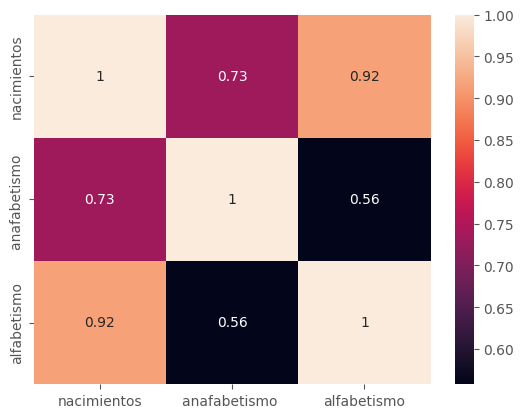

In [63]:
# Este gráfico de calor es unicamente para observar la correlación entre las variables
sns.heatmap(data_numeric.corr(), annot= True)



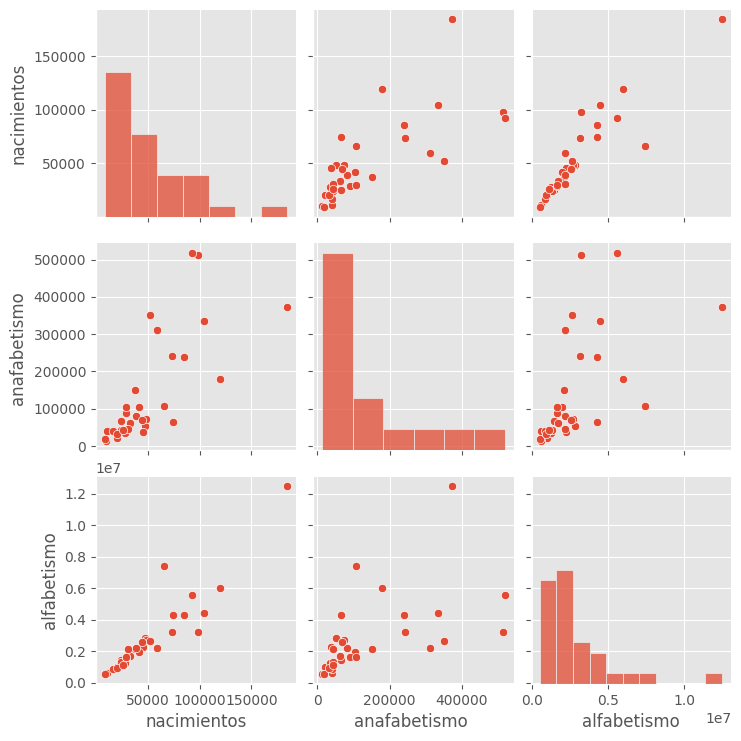

In [64]:
#Aqui tenemos nuestro diagrama de dispersión que nos muestra las relaciones entre las variables de nuestro conjunto de datos
sns.pairplot(data)
# No es complejo , solo nos muestra el comportamiento de cada una de las variables

array([[<Axes: title={'center': 'nacimientos'}>,
        <Axes: title={'center': 'anafabetismo '}>,
        <Axes: title={'center': 'alfabetismo'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

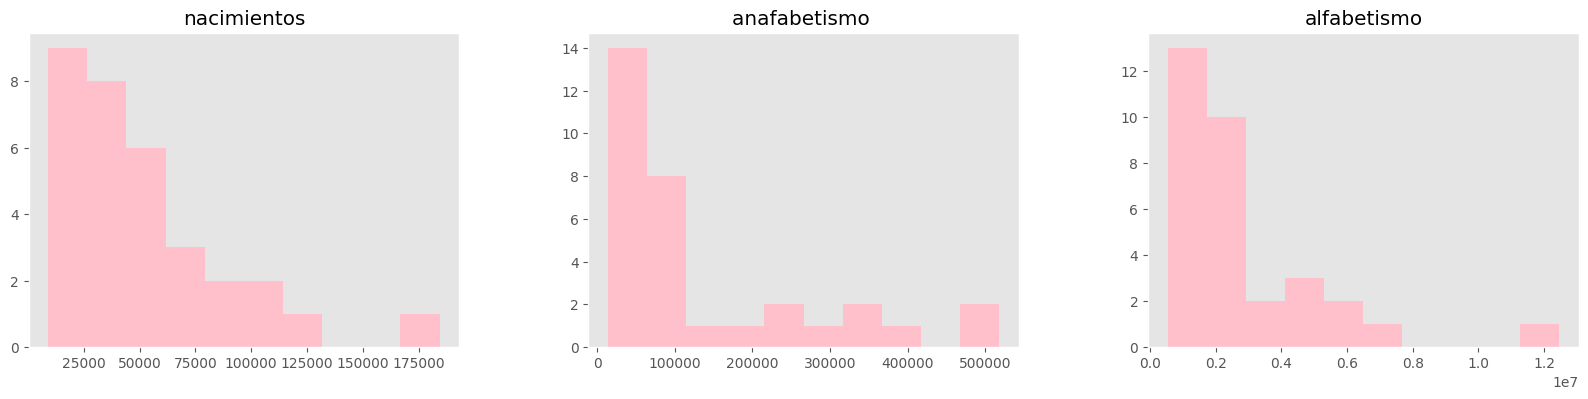

In [65]:
#Histograma, que nos sirve principalmente para ver la forma de nuestro conjunto de datos y observar que distribución sige.
data.hist(figsize=(20,20), layout=(4,3), color='pink', grid= False)

<Axes: >

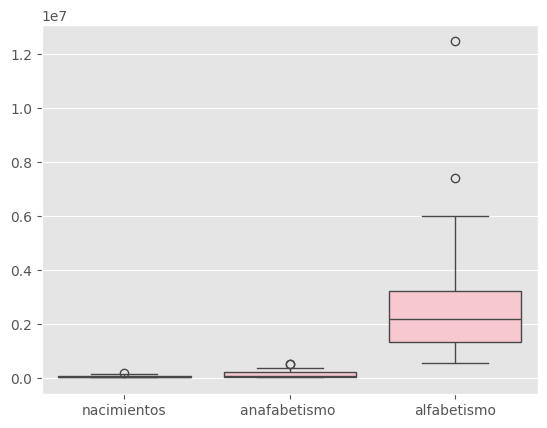

In [66]:
 # Boxplot para encontrar errores y que no nos arruine el modelo
sns.boxplot(data, color = "pink")

<Axes: ylabel='nacimientos'>

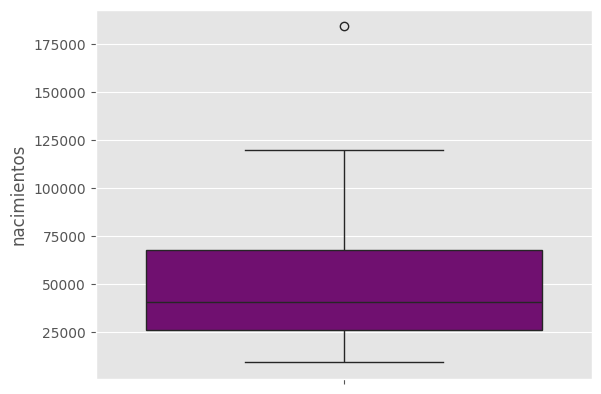

In [67]:
sns.boxplot(data.nacimientos,color= "purple")

<Axes: ylabel='alfabetismo'>

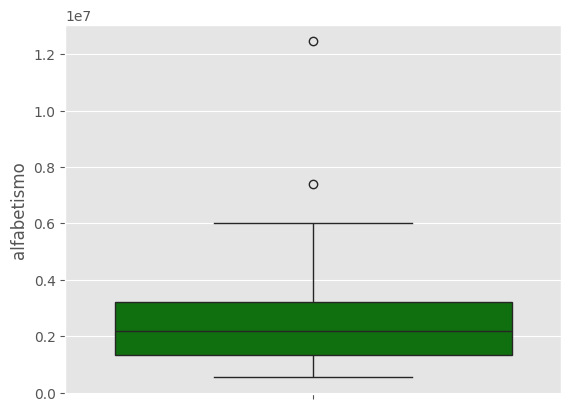

In [68]:
sns.boxplot(data.alfabetismo,color= "green")

Notamos por este diagrama que tenemos outliers que pueden ser por la naturalidad de los datos, ya que son recopilados de distintos lugares de la república y existen mas factores que intervinenen en nuestros datos

# 4. Construye el Modelo de regresión

Es asi que despues de analizar los datos, aunque inicialmente con esta base de datos se buscaba encontrar la relacion entre el analfabetismo y la natalidad debido a nuestro mapa de calor y el analisis de los datos hemos decidido utlizar el modelo de la siguiente forma

**variable independiente(predictora)= alfabetismo**


**variable dependiente(respuesta)= nacimientos**




In [69]:
#Modelo de regresión lineal
# Definir las variables independientes (X) y dependientes (y) para el modelo
X = data[['alfabetismo' ]]
y = data[['nacimientos' ]]
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
                                   X.values.reshape(-1,1),
                                   y.values.reshape(-1,1),
                                   train_size = 0.8,               # mismos datos en el mismo orden
                                   random_state =506,
                                   shuffle = True)                  # Toma datos aleatorios

In [70]:
# Creación del modelo utilizando el modo fórmula ( similar a R)
#smf.ols
data_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['alfabetismo', 'nacimientos'])
modelo = smf.ols(formula = 'nacimientos~alfabetismo', data = data_train)
modelo = modelo.fit()

data_train.head()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:            nacimientos   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.23e-10
Time:                        04:50:11   Log-Likelihood:                -278.31
No. Observations:                  25   AIC:                             560.6
Df Residuals:                      23   BIC:                             563.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.324e+04   5538.084      2.390      

In [71]:
print(f"Los coeficientes son\\:{modelo.params}")
print(f"Beta_0\\:{modelo.params[0]}")
print(f"Beta_1\\:{modelo.params[1]}")
print(f"R cuadrada ajustada:{modelo.rsquared_adj}")
print(f"R cuadrada:{modelo.rsquared}")

Los coeficientes son\:Intercept      13235.548300
alfabetismo        0.013944
dtype: float64
Beta_0\:13235.548300441134
Beta_1\:0.013944279352764767
R cuadrada ajustada:0.8111672755483936
R cuadrada:0.8190353057338773


#5.Establece la ecuación de la recta de pronóstico.
$$ \hat{y}=13235.548300441134+0.013944279352764767x $$



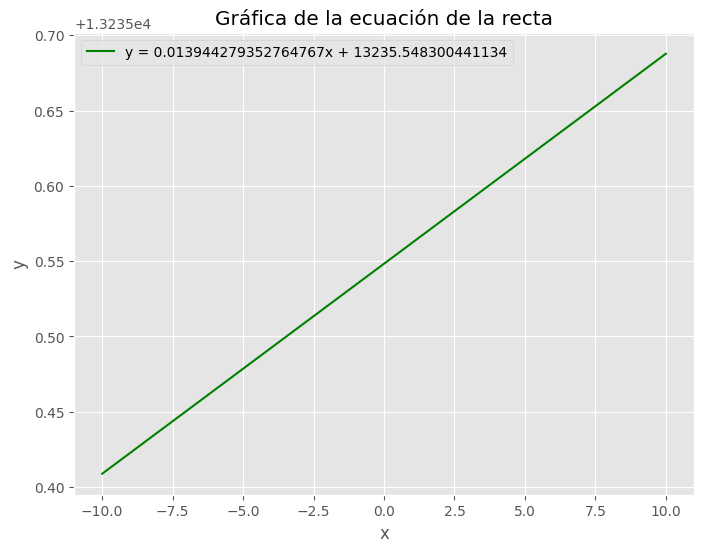

In [72]:
m= modelo.params[1]
b= modelo.params[0]
x = np.linspace(-10, 10, 400)  # Esto crea 400 puntos entre -10 y 10

# Calcula los valores de y según la ecuación de la recta
y = m * x + b

# Crea la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='green', label=f'y = {m}x + {b}')
# Agrega etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la ecuación de la recta')
plt.legend()
plt.grid(True)

# Muestra la gráfica
plt.show()


#6.Realiza el grafico de dispersión con la recta de ajuste.

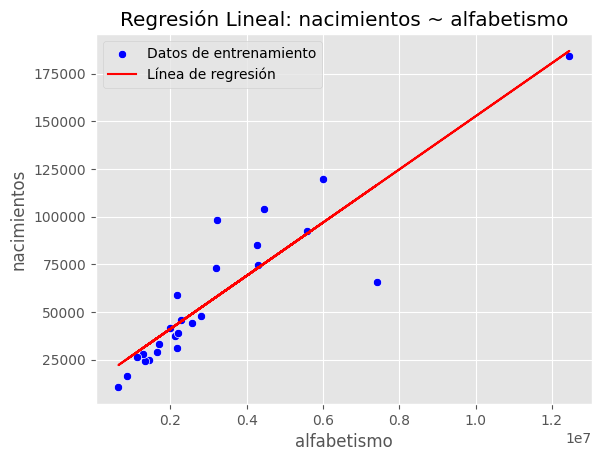

In [73]:
# Gráfico de dispersión de los datos de entrenamiento
sns.scatterplot(x='alfabetismo', y='nacimientos', data=data_train, color ='blue', label='Datos de entrenamiento')

# Línea de regresión ajustada
plt.plot(data_train['alfabetismo'], modelo.predict(data_train['alfabetismo']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('alfabetismo')
plt.ylabel('nacimientos')
plt.title('Regresión Lineal: nacimientos ~ alfabetismo')
plt.legend()

# Mostrar el gráfico
plt.show()

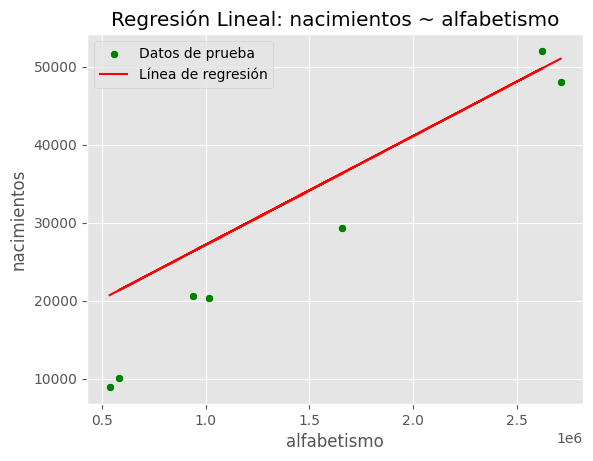

In [74]:
data_test = pd.DataFrame(np.hstack((X_test, y_test)), columns=['alfabetismo', 'nacimientos'])
# Gráfico de dispersión de los datos de prueba
sns.scatterplot(x='alfabetismo', y='nacimientos', data=data_test, color ='green', label='Datos de prueba')

# Línea de regresión ajustada
plt.plot(data_test['alfabetismo'], modelo.predict(data_test['alfabetismo']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('alfabetismo')
plt.ylabel('nacimientos')
plt.title('Regresión Lineal: nacimientos ~ alfabetismo')
plt.legend()

# Mostrar el gráfico
plt.show()

# 7.Realiza la Inferencia sobre $\beta_1$ reportando el valor del estadístico, el p-valor, y concluye si la variable X (predictora) es significativa para el modelo
### Prueba de Significancia para el Coeficiente $β_1$

### Objetivo de la Prueba

Queremos evaluar si el coeficiente $\beta_1$ es significante.

Si $\beta_1$ es significativamente diferente de cero, podemos concluir que existe una relación significativa entre la variable independiente $X$ (alfabetismo) y la variable dependiente $y$ (nacimientos).

###Hipótesis de la Prueba}

Hipótesis Nula $H_0$: $\beta_1 = 0$ (la variable "alfabetismo" no tiene un efecto significativo sobre "nacimientos")

Hipótesis Alternativa $H_1$: $\beta_1 \neq 0$ (la variable "alfabetismo" tiene un efecto significativo sobre "nacimientos")

$$H_0: \beta_1 = 0 \quad vs. \quad H_a: \beta_1 \neq O$$

###Estadístico t

Calculamos el estadístico $t$ para $\beta_1$

$$
t = \frac{\beta_1}{s / \sqrt{SS_{xx}}}
$$

donde $S$ es la estimación de la desviación estándar de los errores, y $SS_{xx}$ es

$
SS_{xx} = \sum_{i=1}^{n} (X_i - \bar{X})^2
$

###Decisión

Si el $p-valor$ $<\alpha$ , rechazamos la hipótesis nula $H_0$ y concluimos que la variable "alfabetismo" es significativa.

Si el $p-valor\geq\alpha$, no rechazamos la hipótesis nula \(H_0\) y concluimos que la variable "alfabetismo" no es significativa.


In [75]:
beta_1 = modelo.params['alfabetismo']
t_value = modelo.tvalues['alfabetismo']
p_value = modelo.pvalues['alfabetismo']

print(f"Coeficiente beta_1: {beta_1}")
print(f"Valor t: {t_value}")
print(f"p-valor: {p_value}")


Coeficiente beta_1: 0.013944279352764767
Valor t: 10.202774847143194
p-valor: 5.227226448062828e-10


In [76]:
alpha = 0.05
if p_value < alpha:
    print("La variable 'alfabetismo' es significativa para el modelo (rechazamos H0).")
else:
    print("La variable 'alfabetismo' no es significativa para el modelo (no rechazamos H0).")

La variable 'alfabetismo' es significativa para el modelo (rechazamos H0).


# 8.Imprime los intervalo de confianza para $\beta_1$

In [77]:
# Mostrar los intervalos de confianza para los coeficientes del modelo
intervalos_confianza = modelo.conf_int()
print("Intervalo de confianza para beta_1:")
print(intervalos_confianza.loc['alfabetismo'])

Intervalo de confianza para beta_1:
0    0.011117
1    0.016772
Name: alfabetismo, dtype: float64


# 9.Imprime el Coeficiente de correlación y  muestre la clasificación baja <=0.4, 0.4<media<=0.7, 0.7<alta<=1. Positiva p negativa

In [89]:
# Calcula el coeficiente de correlación entre las variables
correlation = data[['alfabetismo', 'nacimientos']].corr().iloc[0, 1]

# Imprime el coeficiente de correlación
print(f"Coeficiente de correlación: {correlation}")

# Clasifica el coeficiente de correlación
if correlation < 0.4:
    print("Clasificación: baja")
elif 0.4 <= correlation <= 0.7:
    print("Clasificación: media")
elif 0.7 < correlation <= 1:
    print("Clasificación: alta")

# Determina si la correlación es positiva o negativa
if correlation > 0:
    print("Correlación positiva")
else:
    print("Correlación negativa")


Coeficiente de correlación: 0.9163272919836278
Clasificación: alta
Correlación positiva


# 10.Imprime el Coeficiente de determinación (en porcentaje) y de su interpretación

In [79]:
# Calculamos el coeficiente de relación
r_squared = modelo.rsquared

# Lo convertimos a porcentaje
r_squared_percentage = r_squared * 100

# Imprimimos el coeficiente de determinación y su interpretación
print(f"Coefficient of determination: {r_squared_percentage:.2f}%")

# Interpretación del coeficiente de relación
if r_squared_percentage < 25:
    print("El coeficiente de determinación es bajo, lo que indica que el modelo explica casi toda la varianza de la variable dependiente.")
elif 25 <= r_squared_percentage <= 50:
    print("El coeficiente de determinación es moderado, lo que indica que el modelo explica casi toda la varianza de la variable dependiente.")
elif 50 < r_squared_percentage <= 75:
    print("El coeficiente de determinación es alto, lo que indica que el modelo explica casi toda la varianza de la variable dependiente.")
else:
    print("El coeficiente de determinación es muy alto, lo que indica que el modelo explica casi toda la varianza de la variable dependiente.")


Coefficient of determination: 81.90%
El coeficiente de determinación es muy alto, lo que indica que el modelo explica casi toda la varianza de la variable dependiente.


#11.Realiza el Análisis de residuales


1.   Realiza el análisis descriptivo (histograma, boxplot y qqplot) con
interpretación





In [80]:
residuales = modelo.resid

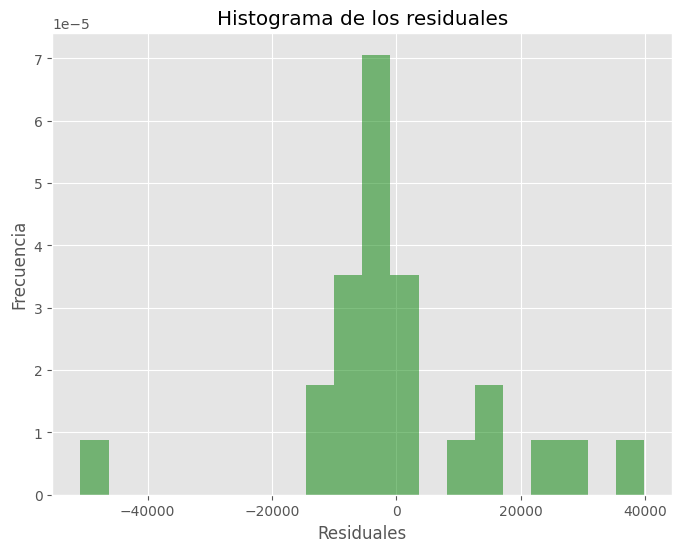

In [81]:
plt.figure(figsize=(8, 6))
plt.hist(residuales, bins=20, density=True, alpha=0.5, color='g')
plt.title('Histograma de los residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()


<Axes: ylabel='None'>

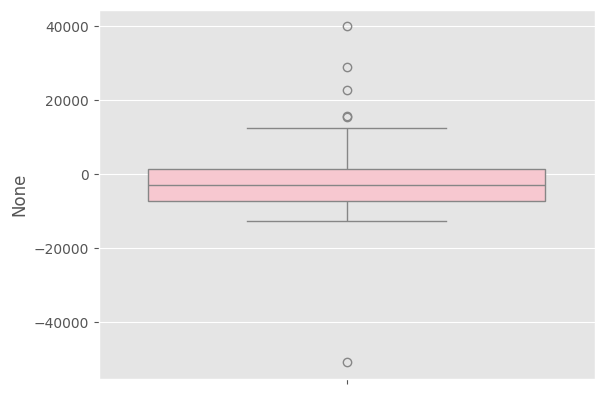

In [82]:
sns.boxplot(y=residuales, color = "pink")

<Figure size 800x600 with 0 Axes>

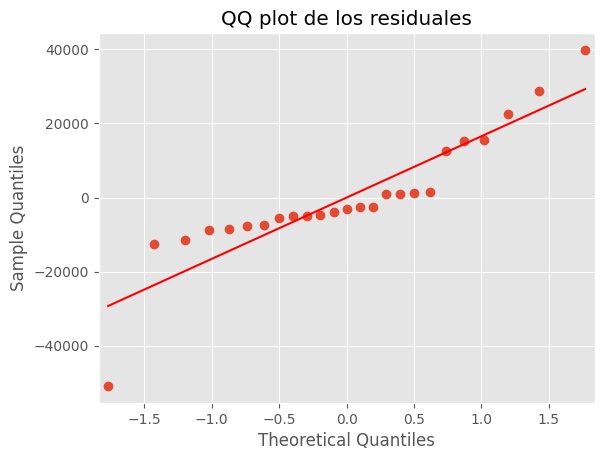

In [83]:
plt.figure(figsize=(8, 6))
sm.qqplot(residuales, line='s')
plt.title('QQ plot de los residuales')
plt.show()


2.   Aplica pruebas de hipótesis para los residuales con el planteamiento de H_0 y H_1 y concluye utilizando la prueba de Jerque-Bera y Shapiro-Wilks

##Prueba de Jarque-Bera
La prueba de Jarque-Bera evalúa si los datos tienen skewness (asimetría) y kurtosis (apuntamiento) similares a una distribución normal.

###Planteamiento de Hipótesis

$H_0$: Los residuales siguen una distribución normal.

$H_1$: Los residuales no siguen una distribución normal.
  $$H_0 vs  H_1$$
Estadístico de Prueba
El estadístico de la prueba de Jarque-Bera se define como:

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$
donde:

 $n$ es el tamaño de la muestra

 $S$ es el skewness de los residuales

 $K$ es la kurtosis de los residuales

###Decisión

Si $p-valor<\alpha$, se rechaza la hipótesis nula.

In [84]:
# Prueba de Jarque-Bera
jb_test_stat, jb_p_value = jarque_bera(residuales)
print(f'Estadístico de prueba Jarque-Bera: {jb_test_stat}, p-valor: {jb_p_value}')

Estadístico de prueba Jarque-Bera: 6.947643285141204, p-valor: 0.0309983394341951


In [85]:
# Conclusiones
alpha = 0.05
print("\nConclusiones:")
if jb_p_value < alpha:
    print("Se rechaza la hipótesis nula de la prueba de Jarque-Bera: los residuales no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula de la prueba de Jarque-Bera: no hay evidencia suficiente para decir que los residuales no siguen una distribución normal.")


Conclusiones:
Se rechaza la hipótesis nula de la prueba de Jarque-Bera: los residuales no siguen una distribución normal.


##Prueba de Shapiro-Wilk
La prueba de Shapiro-Wilk evalúa si una muestra proviene de una distribución normal.

###Planteamiento de Hipótesis
$H_0$: Los residuales siguen una distribución normal

$H_1$: Los residuales no siguen una distribución normal

$$H_0 vs  H_1$$

###Estadístico de Prueba
El estadístico de la prueba de Shapiro-Wilk se define como:
$$
W = \frac{\left( \sum_{i=1}^{n} a_i x_{(i)} \right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$
donde:

$x_{(i)}$ son los datos ordenados

$a_i$ son coeficientes calculados a partir de la matriz de covarianza de los datos ordenados

 $x_i$ son los datos originales

$\bar{x}$ es la media de los datos


###Decisión
Si el $p-valor<\alpha$, se rechaza la hipótesis nula.


In [86]:
# Prueba de Shapiro-Wilk
sw_test_stat, sw_p_value = shapiro(residuales)
print(f'Estadístico de prueba Shapiro-Wilk: {sw_test_stat}, p-valor: {sw_p_value}')

Estadístico de prueba Shapiro-Wilk: 0.868445634841919, p-valor: 0.004026942420750856


In [87]:
if sw_p_value < alpha:
    print("Se rechaza la hipótesis nula de la prueba de Shapiro-Wilk: los residuales no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula de la prueba de Shapiro-Wilk: no hay evidencia suficiente para decir que los residuales no siguen una distribución normal.")

Se rechaza la hipótesis nula de la prueba de Shapiro-Wilk: los residuales no siguen una distribución normal.


#12.Verifica si los residuales se distribuyen de forma independiente o no correlacionados.
Con la prueba de Durbin-Watson sabemos si los errores tienen correlación, y nos dice que si son cercanos a 2 sugiere no correlación.

In [88]:
DW = sm.stats.stattools.durbin_watson(modelo.resid)
JB, JBp, _, _ =sm.stats.stattools.jarque_bera(modelo.resid)

print(f'Durbin-Watson: {DW}')

Durbin-Watson: 2.1529553696831427


Notamos que no hay correlación por el valor obtenido